Author: Aranya Banerjee Data science and Buisness Analytics Internship The Sparks foundation GRIP Nov 20 Task 6-Create the Decision Tree classifier and visualize it graphically.

# Importing Libraries

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np

# Loading The data

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(np.c_[iris['data'],iris['target']],
             columns = np.append(iris['feature_names'], ['target']))

# Data manipulation

In [3]:
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Data visualization

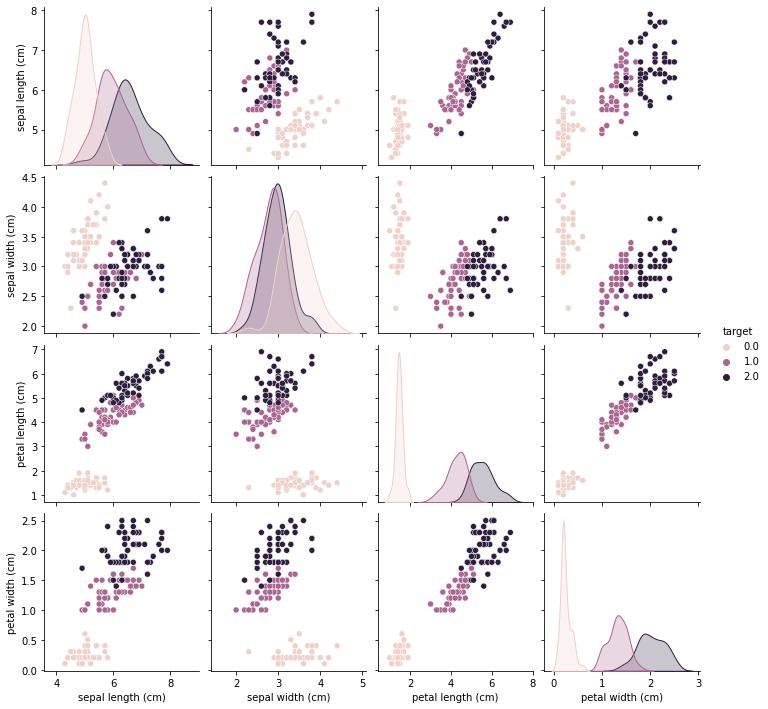

In [8]:
sns.pairplot(iris_df, hue = 'target') 

c:\users\sainath\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

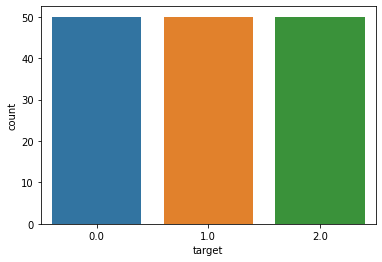

In [9]:
# Count the target class
sns.countplot(iris_df['target']) 

<AxesSubplot:>

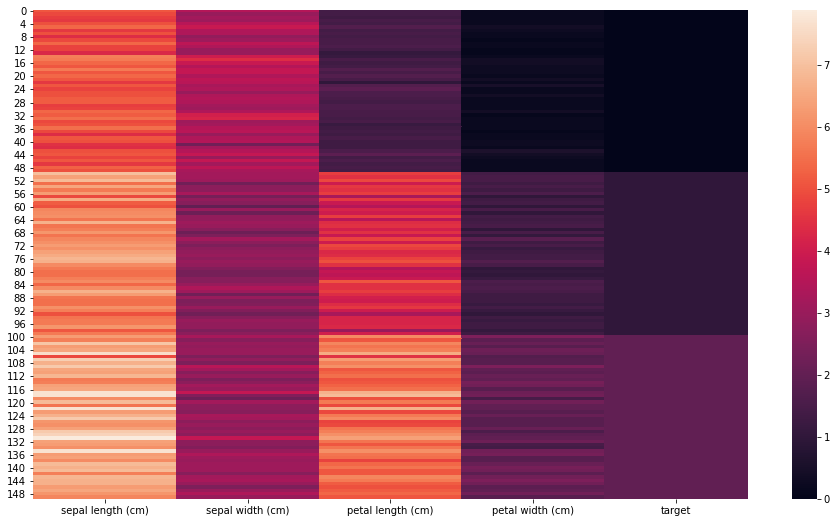

In [10]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(iris_df)

In [11]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

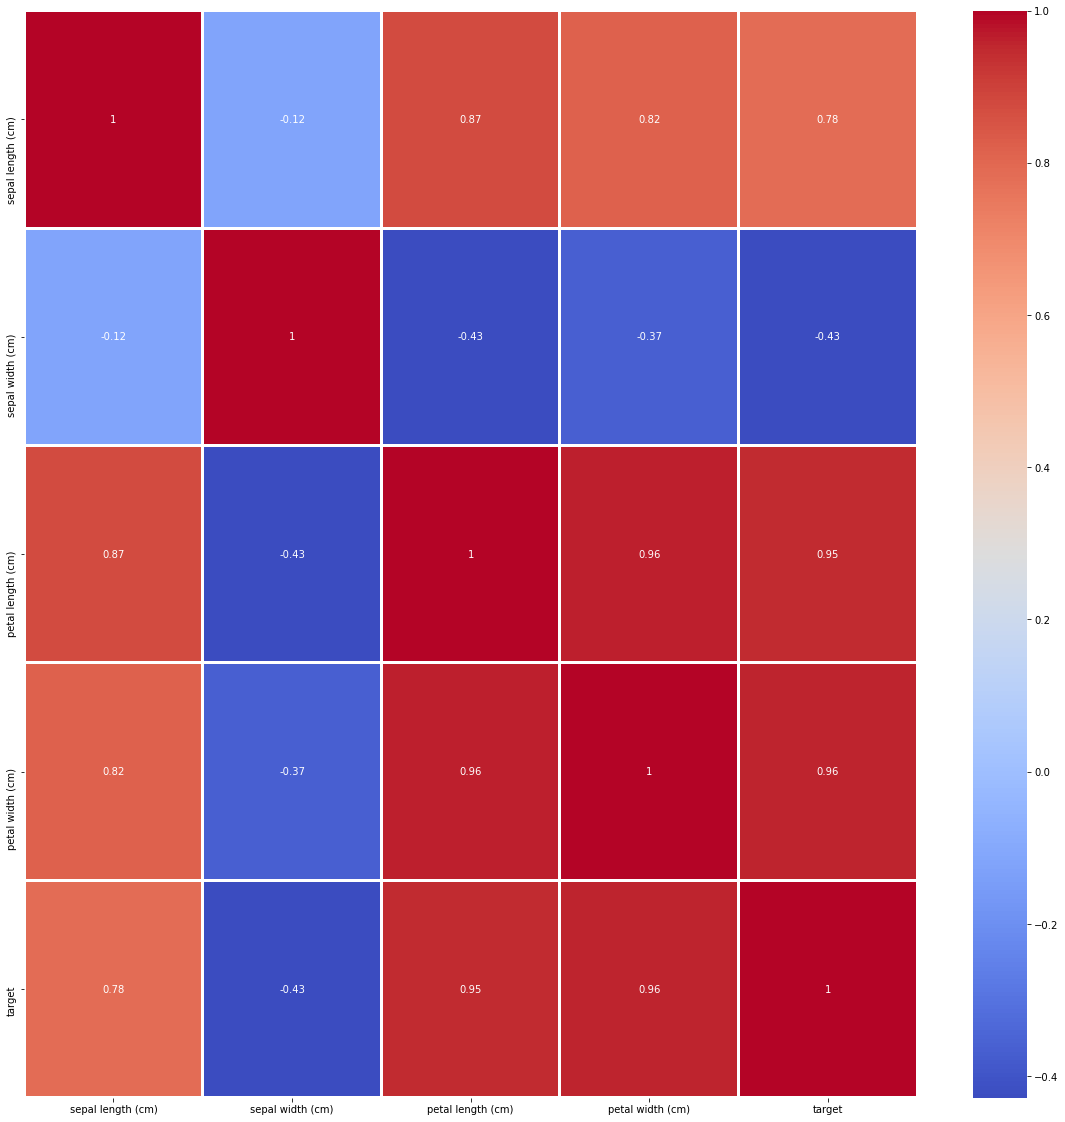

In [12]:
# Heatmap of Correlation m# Heatmap of Correlation matrix of iris DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(iris_df.corr(), annot = True, cmap ='coolwarm', linewidths=2) 

In [13]:
# create second DataFrame by droping target
iris_df2 = iris_df.drop(['target'], axis = 1)
print("The shape of 'iris_df2' is : ", iris_df2.shape)

The shape of 'iris_df2' is :  (150, 4)


c:\users\sainath\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


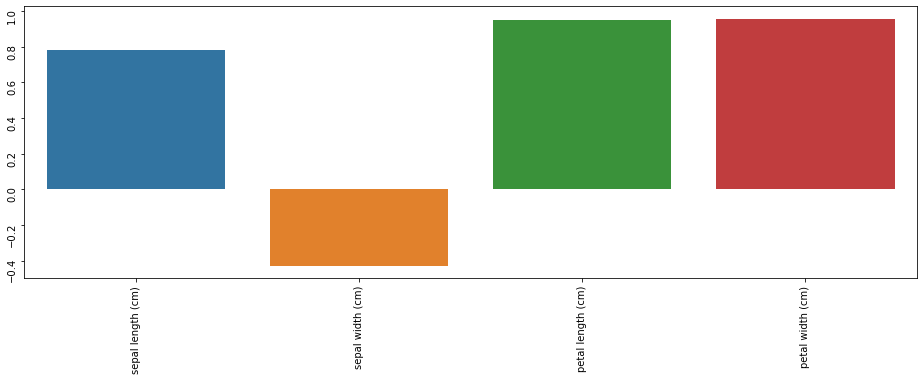

In [14]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(iris_df2.corrwith(iris_df.target).index, iris_df2.corrwith(iris_df.target))
ax.tick_params(labelrotation = 90) 

In [15]:
iris_df2.corrwith(iris_df.target).index

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Split DatFrame in Train and Test

In [16]:
# input variable
X = iris_df.drop(['target'], axis = 1) 
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# output variable
y = iris_df['target']
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

In [18]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [19]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [20]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5


In [21]:
y_train

39     0.0
53     1.0
79     1.0
10     0.0
50     1.0
      ... 
8      0.0
73     1.0
144    2.0
118    2.0
99     1.0
Name: target, Length: 120, dtype: float64

In [22]:
y_test

82     1.0
134    2.0
114    2.0
42     0.0
109    2.0
57     1.0
1      0.0
70     1.0
25     0.0
84     1.0
66     1.0
133    2.0
102    2.0
107    2.0
26     0.0
23     0.0
123    2.0
130    2.0
21     0.0
12     0.0
71     1.0
128    2.0
48     0.0
72     1.0
88     1.0
148    2.0
74     1.0
96     1.0
63     1.0
132    2.0
Name: target, dtype: float64

# Machine learning model building

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Decision Tree Classifier

In [25]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9

In [26]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.4

# Fit the classifier with default hyper-parameters

In [27]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

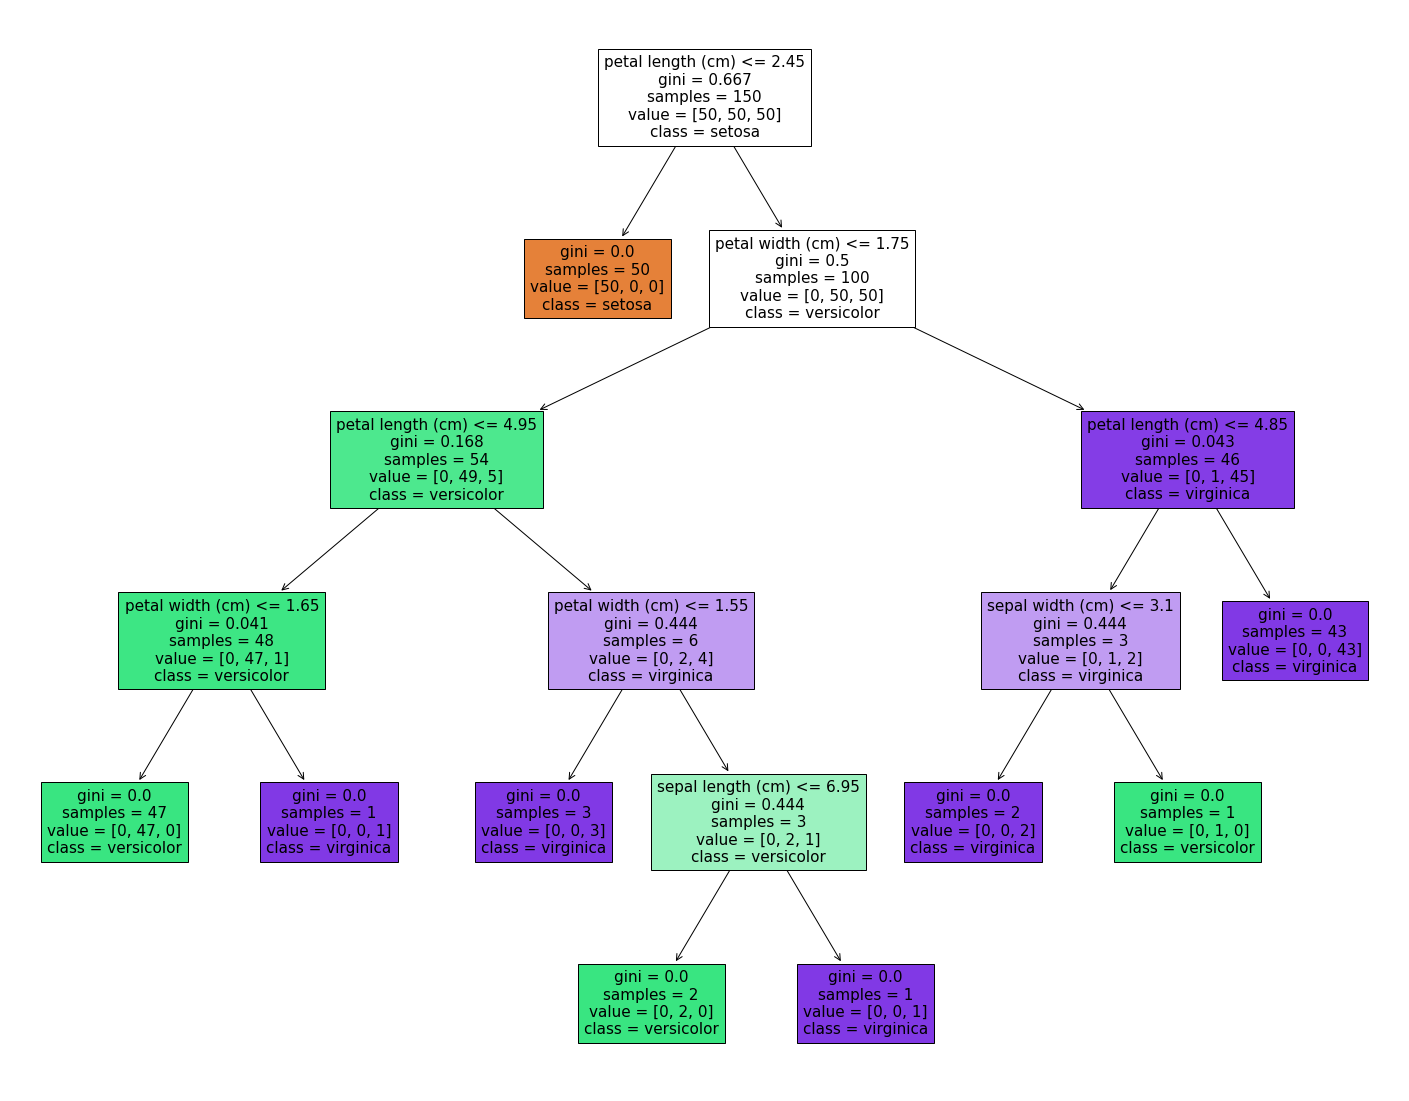

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)